In [41]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [81]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.axisbelow': True})

In [2]:
questions_df = pd.read_parquet(
    "../data/intermediate/cleaned_arena_data/questions.parquet"
)
threads_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/threads.parquet")

In [3]:
questions_df

,question_id,thread_id,turn_number,user_query,question_role
0,q_00000000,thread_00000000,1,what models are you?,user
1,q_00000001,thread_00000001,1,تجم تفسرلي علاش فما صبع زايد في مرض blackfond ...,user
2,q_00000002,thread_00000002,1,Ellen White über die Flache Erde,user
3,q_00000003,thread_00000003,1,Test,user
4,q_00000004,thread_00000004,1,"Site: ""m.egwwritings.org/en"" über die flache Erde",user
...,...,...,...,...,...
32879,q_00032879,thread_00024066,6,EPDM기반의 식을 알려줘,user
32880,q_00032880,thread_00024067,1,Какой маленький бизнес открыть в новосибирске?,user
32881,q_00032881,thread_00024067,2,А какой можно начать дома с минимальными затра...,user
32882,q_00032882,thread_00024067,3,Сделай анализ по авито,user


In [17]:
questions_df.user_query.nunique()

28907

In [4]:
questions_merged_df = threads_df.merge(
    questions_df[["thread_id", "question_id", "turn_number", "user_query"]],
    on="thread_id",
)

In [22]:
trump_queries = questions_merged_df[
    questions_merged_df.user_query.str.lower().str.contains("trump")
]

In [28]:
trump_queries[["user_query"]].to_csv("./trump_queries.csv", index=None)

In [25]:
for item in trump_queries.user_query:
    print(item)

find me where and when is trump doing speech today after talk with putin
how many government scientists is Trump planning to fire
what time will Trump release the jfk files
donald trump news
Trump deports 238 ‘gang members’ to El Salvador
Why Donald Trump keep saying that tarrifs are paid by the exporter, can you fact check? Could that mean that the importer and the exporter are the same company in many cases?
trump news 3/18/25
dernire controverse de donald trump
Outcomes of March 18 2025 Trump-Putin phone call
Did Trump release the epstein files
why Supreme Court Chief Justice John Roberts rejects Trump's call for impeaching judge who ruled against him
what did trump do yesterday?
what did trump do yesterday?
what did trump do yesterday?
what did trump do yesterday?
which publically listed European companies have seen their share price improve following Trump's recent moves to withdraw / soften US security commitments to Europe / NATO? How much have their SPs risen? 
Trump, Putin cal

In [5]:
questions_merged_df.primary_intent.value_counts()

primary_intent
Factual Lookup         6015
Info Synthesis         5763
Analysis               3568
Explanation            3415
Recommendation         3357
Guidance               3357
Creative Generation    3264
Other                  3044
Text Processing        1100
Name: count, dtype: int64

In [67]:
filtered_questions_df = questions_merged_df[
    questions_merged_df.languages.apply(lambda x: len(x) == 1 and "English" in x)
]#.query("client_country == 'US'")

In [68]:
len(filtered_questions_df)

17168

In [69]:
filtered_questions_df.user_query.value_counts()

user_query
$MODERATION$ YOUR TEXT VIOLATES OUR CONTENT MODERATION GUIDELINES.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [9]:
len(questions_merged_df)

32884

In [10]:
questions_merged_df.primary_intent.value_counts()

primary_intent
Factual Lookup         6015
Info Synthesis         5763
Analysis               3568
Explanation            3415
Recommendation         3357
Guidance               3357
Creative Generation    3264
Other                  3044
Text Processing        1100
Name: count, dtype: int64

In [16]:
questions_merged_df.query("primary_intent == 'Info Synthesis'").user_query.sample(10)

20072            Is the low taper fade meme still MASSIVE?
10667    You know the Sonic What If? fancomic about wha...
12322    Which companies have the best remote developme...
11515            Найди мне данные про ПО Сфера и ее модули
22098    Compare the specs between ipad 9th gen and hon...
6287                              Average salary/wage rate
29350                               Latest news on Ukraine
16127                              latest tariff situation
2372               search infamouse graphic design quoztes
13334                What happened to today's stock market
Name: user_query, dtype: object

In [19]:
trump_questions_df = questions_merged_df[
    questions_merged_df.user_query.str.lower().str.contains("trump")
]

In [31]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [34]:
trump_queries.user_query

8        find me where and when is trump doing speech t...
27       how many government scientists is Trump planni...
78              what time will Trump release the jfk files
209                                      donald trump news
233        Trump deports 238 ‘gang members’ to El Salvador
                               ...                        
28455    Please devise a single panel political cartoon...
28676    Since Trump took office, the U.S. has spent ab...
29674    Elon Musk Out at Tesla? Automaker's Board Repo...
29675    How much is actually news and how much is yell...
30646      what is the latest concensus on trump's tariffs
Name: user_query, Length: 222, dtype: object

In [35]:
embeddings = model.encode(trump_queries.user_query.values)

In [38]:
embeddings

array([[ 0.09154678,  0.00135486,  0.04760856, ..., -0.00419786,
        -0.07835842, -0.03332822],
       [ 0.05847841, -0.00485975,  0.10577406, ..., -0.07445777,
         0.01458153,  0.00947916],
       [ 0.02657595,  0.01695785, -0.01534929, ...,  0.00924313,
        -0.07531891,  0.02373923],
       ...,
       [-0.01999084,  0.01240182,  0.14739536, ..., -0.06165464,
         0.02963084,  0.07473945],
       [ 0.0590217 ,  0.0115913 ,  0.03229765, ..., -0.04271543,
         0.06956494,  0.02363146],
       [-0.02181212, -0.04859022,  0.05283807, ..., -0.03753631,
         0.07481737,  0.07107797]], shape=(222, 384), dtype=float32)

In [47]:
thread_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/threads.parquet")

In [53]:
thread_df

,thread_id,original_row_id,timestamp,total_turns,winner,judge,primary_intent,secondary_intent,languages,client_country
0,thread_00000000,0,2025-03-18 16:39:00.550,1,tie,78996144fc08f820066fdaa66f170da6e158c24ad70c4e...,Other,Unassigned,[English],None
1,thread_00000001,1,2025-03-18 16:39:35.849,1,model_a,023f8e28f2b51ef62a7adb0fdf06709b8004773b41ca38...,Explanation,Unassigned,[Arabic],None
2,thread_00000002,2,2025-03-18 16:43:18.951,1,model_b,febd105f4f29cf47f72d9b5bf825bdb848fb009b7b0cd6...,Info Synthesis,Factual Lookup,[German],None
3,thread_00000003,3,2025-03-18 16:43:47.861,1,tie,d3560a0fe5416204140c8b1269b3ff10108c36fe59d355...,Other,Unassigned,[English],None
4,thread_00000004,4,2025-03-18 16:47:47.787,1,model_b,febd105f4f29cf47f72d9b5bf825bdb848fb009b7b0cd6...,Info Synthesis,Unassigned,"[German, English]",None
...,...,...,...,...,...,...,...,...,...,...
24064,thread_00024064,24064,2025-05-09 05:10:41.078,3,model_b,43956094e8aa8b172f5d869d2b155e6dd7a86065fd9e1f...,Guidance,Unassigned,[English],TR
24065,thread_00024065,24065,2025-05-09 05:16:52.273,1,model_b,1eda0ecd002074b1624f41b7bea304ad5f8166575705e4...,Factual Lookup,Unassigned,[Japanese],JP
24066,thread_00024066,24066,2025-05-09 05:16:59.602,6,None,eb8e298d3bf023a06c2bc40fbf35b54304d45eac20bfe9...,Explanation,Unassigned,[Korean],KR
24067,thread_00024067,24067,2025-05-09 05:17:15.568,3,None,1a1ce960efb853bcf8a7a712d0b4777460b9fcd53a1ada...,Recommendation,Unassigned,[Russian],RU


In [108]:
filtered_questions_df = pd.read_parquet("../data/intermediate/question_analysis/english_questions.parquet")

In [109]:
filtered_questions_df

,question_id,thread_id,turn_number,user_query,question_role,question_length
0,q_00000000,thread_00000000,1,what models are you?,user,20
1,q_00000003,thread_00000003,1,Test,user,4
2,q_00000005,thread_00000005,1,Rarest mineral,user,15
3,q_00000007,thread_00000007,1,What's the weather in Sf today,user,30
4,q_00000008,thread_00000008,1,find me where and when is trump doing speech t...,user,72
...,...,...,...,...,...,...
16195,q_00032867,thread_00024062,1,Follow this traffic drop template with real in...,user,935
16196,q_00032869,thread_00024063,1,If I save thousands of dollars into my rdsp ho...,user,66
16197,q_00032870,thread_00024064,1,what should be the computer specifications to ...,user,69
16198,q_00032871,thread_00024064,2,what about gemma3:12b,user,21


In [75]:
len(filtered_questions_df)

16742

In [104]:
temp_query = filtered_questions_df.query("question_length > 1000 and question_length < 1200").iloc[0].user_query

In [105]:
temp_query

'How to fix this issue:\n\nIn file included from /export/contextual-llm/revanth/miniconda3/envs/rag/lib/python3.11/site-packages/flashinfer/data/include/flashinfer/cutlass_utils.cuh:40,\n                 from /root/.cache/flashinfer/90/generated/batch_prefill_with_kv_cache_dtype_q_bf16_dtype_kv_bf16_dtype_o_bf16_dtype_idx_i32_head_dim_qk_128_head_dim_vo_128_posenc_0_use_swa_False_use_logits_cap_False_f16qk_False_sm90/batch_prefill_sm90_config.inc:6,\n                 from /root/.cache/flashinfer/90/generated/batch_prefill_with_kv_cache_dtype_q_bf16_dtype_kv_bf16_dtype_o_bf16_dtype_idx_i32_head_dim_qk_128_head_dim_vo_128_posenc_0_use_swa_False_use_logits_cap_False_f16qk_False_sm90/batch_prefill_sm90.cu:26:\n/export/contextual-llm/revanth/miniconda3/envs/rag/lib/python3.11/site-packages/flashinfer/data/cutlass/tools/util/include/cutlass/util/reference/device/tensor_fill.h:52:10: fatal error: curand_kernel.h: No such file or directory\n   52 | #include <curand_kernel.h>\n      |          

In [103]:
len(temp_query.split())

200

In [107]:
len(filtered_questions_df[filtered_questions_df.question_length < 1000]) / len(filtered_questions_df)

0.9513797634691196

(array([1.0649e+04, 2.6560e+03, 1.0850e+03, 5.3600e+02, 3.2700e+02,
        2.0000e+02, 1.5400e+02, 1.1100e+02, 1.3800e+02, 7.3000e+01,
        5.0000e+01, 4.9000e+01, 4.9000e+01, 2.8000e+01, 3.7000e+01,
        3.8000e+01, 2.4000e+01, 2.0000e+01, 3.1000e+01, 4.7000e+01,
        3.3000e+01, 4.4000e+01, 2.8000e+01, 1.5000e+01, 1.0000e+01,
        9.0000e+00, 9.0000e+00, 1.6000e+01, 9.0000e+00, 6.0000e+00,
        1.5000e+01, 1.4000e+01, 6.0000e+00, 1.7000e+01, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 9.0000e+00, 4.0000e+00, 5.0000e+00,
        3.0000e+00, 7.0000e+00, 5.0000e+00, 7.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 7.0000e+00, 1.5000e+01,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.2000e+01, 3.00

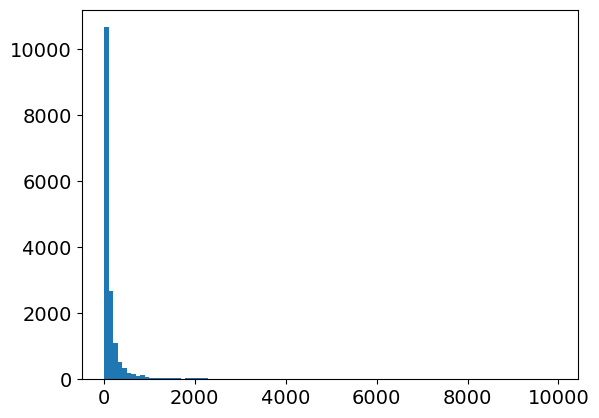

In [84]:
plt.hist(filtered_questions_df.question_length, bins=100)

In [79]:
filtered_questions_df.sample(10)

,question_id,thread_id,turn_number,user_query,question_role,question_length
11457,q_00022486,thread_00016552,1,Write a “The Reason You Suck” speech targeted ...,user,58
13503,q_00026827,thread_00019713,1,Analyze this walkthrough: https://attachments....,user,109
9758,q_00019010,thread_00014023,1,"Is dataverse required for Synapse link, if not...",user,74
12524,q_00024823,thread_00018307,1,most likely outcome in the upcoming match betw...,user,72
5044,q_00010073,thread_00007428,1,Provide me books that talks only about ''crypt...,user,57
9342,q_00018285,thread_00013474,1,find a picture of political map of San Fernand...,user,61
8605,q_00016938,thread_00012495,1,how does moments based marketing can be used f...,user,153
4540,q_00008985,thread_00006590,1,what is deepseek v4,user,19
15330,q_00030057,thread_00022028,2,Составь вопросы по этим текстам и задания на п...,user,1500
4970,q_00009921,thread_00007326,1,give me the top 10 things i have to know to be...,user,59


In [52]:
thread_df.query("thread_id == 'thread_00005113'")

,thread_id,original_row_id,timestamp,total_turns,winner,judge,primary_intent,secondary_intent,languages,client_country
5113,thread_00005113,5113,2025-03-31 23:08:52.300,4,None,aa71d9be0da748da7956ed04693d151a07d24721513a8b...,Guidance,Unassigned,[English],DE


In [115]:
filtered_questions_df

,question_id,thread_id,turn_number,user_query,question_role,question_length
0,q_00000000,thread_00000000,1,what models are you?,user,20
1,q_00000003,thread_00000003,1,Test,user,4
2,q_00000005,thread_00000005,1,Rarest mineral,user,15
3,q_00000007,thread_00000007,1,What's the weather in Sf today,user,30
4,q_00000008,thread_00000008,1,find me where and when is trump doing speech t...,user,72
...,...,...,...,...,...,...
16195,q_00032867,thread_00024062,1,Follow this traffic drop template with real in...,user,935
16196,q_00032869,thread_00024063,1,If I save thousands of dollars into my rdsp ho...,user,66
16197,q_00032870,thread_00024064,1,what should be the computer specifications to ...,user,69
16198,q_00032871,thread_00024064,2,what about gemma3:12b,user,21


In [112]:
embedding_df = pd.read_parquet("../data/intermediate/question_analysis/question_embeddings.parquet")

In [113]:
embedding_df

,question_id,embedding_dim_0,embedding_dim_1,embedding_dim_2,embedding_dim_3,embedding_dim_4,embedding_dim_5,embedding_dim_6,embedding_dim_7,embedding_dim_8,...,embedding_dim_374,embedding_dim_375,embedding_dim_376,embedding_dim_377,embedding_dim_378,embedding_dim_379,embedding_dim_380,embedding_dim_381,embedding_dim_382,embedding_dim_383
0,q_00000000,-0.050277,-0.038691,0.031288,0.017418,0.020181,0.016734,-0.050018,0.044938,-0.008188,...,-0.050258,0.035582,0.039557,-0.038656,-0.014772,-0.023286,0.113934,-0.060589,-0.119848,0.018226
1,q_00000003,0.011573,0.025136,-0.036702,0.059325,-0.007149,-0.041194,0.077087,0.037442,0.012449,...,0.024136,-0.013285,0.006584,0.024441,-0.137136,0.063914,0.196718,-0.006030,0.053194,-0.055226
2,q_00000005,-0.088497,-0.006892,-0.031636,0.054643,0.021555,-0.035480,0.105304,0.081862,-0.057034,...,-0.019110,0.063772,0.037892,0.001182,-0.080631,-0.016791,0.105308,-0.068906,0.042597,0.029517
3,q_00000007,0.024769,0.024241,0.086561,0.037333,0.055036,0.006928,0.052894,-0.012939,-0.039977,...,-0.044029,0.045647,-0.075210,0.031693,-0.049310,-0.000597,-0.109086,-0.041006,-0.108370,0.058959
4,q_00000008,0.091547,0.001355,0.047609,-0.001197,0.041484,-0.005336,0.017463,-0.031565,-0.004608,...,0.042807,0.086708,0.061713,-0.131562,0.003588,-0.016388,-0.018692,-0.004198,-0.078359,-0.033328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,q_00032867,-0.014872,-0.038528,0.097519,-0.009888,0.048336,0.083206,0.010408,0.075380,-0.131231,...,0.035525,-0.002631,-0.014322,0.002091,0.033466,-0.014849,0.048609,0.036076,0.018111,0.057941
16196,q_00032869,0.042662,-0.029815,-0.048873,-0.009290,0.062389,0.034192,0.109033,0.079444,0.009840,...,-0.011310,0.004292,-0.006801,-0.025769,0.092560,0.040860,-0.045832,-0.034646,-0.014848,-0.045988
16197,q_00032870,0.045223,-0.032889,0.013942,-0.049912,-0.059453,-0.043311,-0.098691,-0.017375,-0.121734,...,0.100497,0.014672,-0.056922,0.055104,0.027440,0.094958,-0.010419,0.001308,-0.044534,-0.013994
16198,q_00032871,-0.055890,-0.008518,0.000558,-0.046819,-0.037263,-0.039445,0.041913,-0.072153,-0.087326,...,0.066052,0.034355,0.023843,0.080753,0.059079,0.050249,0.060782,-0.046639,-0.066293,0.048753


In [116]:
question_features = pd.read_parquet("../data/intermediate/question_analysis/question_features.parquet")

In [117]:
question_features

,question_id,client_country,question_length_chars,question_length_words,turn_number
0,q_00000000,None,20,4,1
1,q_00000003,None,4,1,1
2,q_00000005,None,15,2,1
3,q_00000007,None,30,6,1
4,q_00000008,None,72,14,1
...,...,...,...,...,...
16195,q_00032867,IN,935,120,1
16196,q_00032869,CA,66,14,1
16197,q_00032870,TR,69,12,1
16198,q_00032871,TR,21,3,2
